In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [2]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6','column 7','column 8','column 9',]
df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\incomplete\Incomplete Datasets Without Labels\Glass\Glass_NN_20.xlsx', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9
0,NaN,13.64,NaN,1.10,71.78,0.06,8.75,NaN,0.0
1,1.51761,13.89,NaN,1.36,72.73,0.48,7.83,NaN,0.0
2,1.51618,13.53,NaN,NaN,NaN,0.39,7.78,0.00,0.0
3,1.51766,13.21,3.69,1.29,72.61,NaN,8.22,0.00,0.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0
...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,NaN,NaN
210,1.51685,14.92,0.00,1.99,73.06,NaN,NaN,NaN,0.0
211,1.52065,NaN,0.00,2.02,73.42,0.00,8.44,1.64,NaN
212,1.51651,NaN,0.00,1.94,73.61,0.00,8.48,1.57,0.0


In [3]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
float64		column 1	30
float64		column 2	30
float64		column 3	63
float64		column 4	30
float64		column 5	20
float64		column 6	53
float64		column 7	23
float64		column 8	63
float64		column 9	60


In [4]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9
count,184.000000,184.000000,151.000000,184.000000,194.000000,161.000000,191.000000,151.000000,154.000000
mean,1.518333,13.379674,2.814305,1.463750,72.668918,0.478323,8.968429,0.153444,0.047208
std,0.003077,0.739403,1.345787,0.485021,0.680491,0.552982,1.428794,0.479496,0.084641
min,1.511150,11.020000,0.000000,0.340000,69.890000,0.000000,5.430000,0.000000,0.000000
25%,1.516545,12.920000,2.715000,1.197500,72.332500,0.150000,8.280000,0.000000,0.000000
50%,1.517650,13.280000,3.480000,1.375000,72.785000,0.560000,8.610000,0.000000,0.000000
75%,1.519153,13.757500,3.610000,1.630000,73.077500,0.600000,9.140000,0.000000,0.090000
max,1.533930,15.790000,3.980000,3.500000,75.180000,6.210000,16.190000,3.150000,0.510000


<AxesSubplot:>

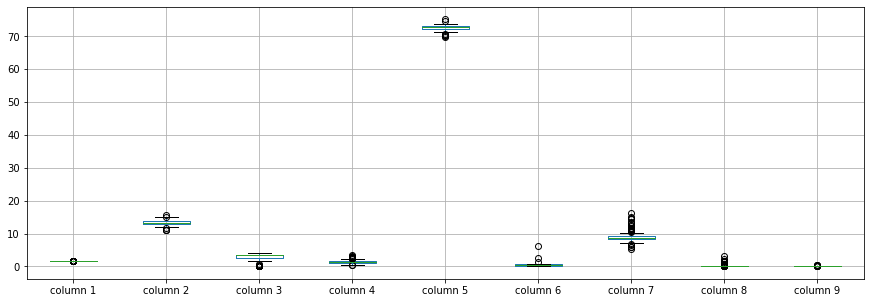

In [5]:
df.boxplot(return_type='axes', figsize=(15,5))

In [6]:
df.mean()

column 1     1.518333
column 2    13.379674
column 3     2.814305
column 4     1.463750
column 5    72.668918
column 6     0.478323
column 7     8.968429
column 8     0.153444
column 9     0.047208
dtype: float64

In [7]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9
column 1,1.000000,-0.061583,-0.030392,-0.344338,-0.543698,-0.258178,0.825986,0.157516,0.068093
column 2,-0.061583,1.000000,-0.159326,0.311190,-0.219800,-0.488922,-0.237213,0.480809,-0.178982
column 3,-0.030392,-0.159326,1.000000,-0.459836,-0.158946,0.057094,-0.393563,-0.346253,0.141110
column 4,-0.344338,0.311190,-0.459836,1.000000,0.037437,0.276963,-0.217202,0.481692,-0.025386
column 5,-0.543698,-0.219800,-0.158946,0.037437,1.000000,-0.064804,-0.240407,-0.057008,-0.007424
column 6,-0.258178,-0.488922,0.057094,0.276963,-0.064804,1.000000,-0.237771,-0.134280,0.011105
column 7,0.825986,-0.237213,-0.393563,-0.217202,-0.240407,-0.237771,1.000000,-0.058885,0.001910
column 8,0.157516,0.480809,-0.346253,0.481692,-0.057008,-0.134280,-0.058885,1.000000,-0.152981
column 9,0.068093,-0.178982,0.141110,-0.025386,-0.007424,0.011105,0.001910,-0.152981,1.000000


In [8]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [9]:
imputer = md.Midas(layer_structure = [9,9+86,9+86+86,9+86+86+86,9+86+86+86+86,9+86+86+86+86+86,9+86+86+86+86,9+86+86+86,9+86+86,9+86,9], vae_layer = False, seed = 9)
imputer.build_model(df)
imputer.train_model(training_epochs=50)


Size index: [9]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 91.31988408015324
Epoch: 1 , loss: 90.94123136080228
Epoch: 2 , loss: 91.27286353478065
Epoch: 3 , loss: 90.83473264254056
Epoch: 4 , loss: 90.81512568547176
Epoch: 5 , loss: 90.80978041428786
Epoch: 6 , loss: 90.87125983605019
Epoch: 7 , loss: 91.19872342623196
Epoch: 8 , loss: 90.73889512282152
Epoch: 9 , loss: 90.76837627704327
Epoch: 10 , loss: 90.6612061720628
Epoch: 11 , loss: 91.03011322021484
Epoch: 12 , loss: 90.52581963172325
Epoch: 13 , loss: 90.35815781813402
Epoch: 14 , loss: 90.1005853506235
Epoch: 15 , loss: 90.25894693227914
Epoch: 16 , loss: 88.7369161752554
Epoch: 17 , loss: 88.56519963191106
Epoch: 18 , loss: 88.811155465933
Epoch: 19 , loss: 87.91295917217548
Epoch: 20 , loss: 86.63802278958835
Epoch: 21 , loss: 85.29432208721454
Epoch: 22 , loss: 84.94896287184496
Epoch: 23 , loss: 83.91000072772687
Epoch: 24 , loss: 82.88197150597206
Epoch: 25 , loss: 81.96919602614183
Epoch: 26 , 

In [10]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(214, 9)

In [11]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1     1.519660
column 2    14.770000
column 3     3.750000
column 4     0.786466
column 5    72.020000
column 6     0.030000
column 7     9.000000
column 8     0.000000
column 9    -0.016299
Name: 21, dtype: float64

In [12]:
complete_df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\complete\Original Datasets Without Labels\Glass.xlsx', header=None,names=column_names)

In [13]:
new_df-complete_df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9
0,0.275471,0.000000,-0.929884,0.000000,0.000000,0.000000,0.000000,0.195293,0.000000
1,0.000000,0.000000,-0.626566,0.000000,0.000000,0.000000,0.000000,0.059364,0.000000
2,0.000000,0.000000,-1.234990,-0.101668,-10.805842,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.000000,-0.094954,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...
209,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.044607,0.009312
210,0.000000,0.000000,0.000000,0.000000,0.000000,0.357587,-2.519249,-1.481723,0.000000
211,0.000000,3.325192,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.097857
212,0.000000,-10.576564,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


Calculating NRMSE Value

In [14]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [15]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [16]:
numerator=Frobenius_norm(new_df-complete_df)
denominator=Frobenius_norm(complete_df)
numerator, denominator

(147.35569022053895, 1090.4359815890969)

In [17]:
NRMS=numerator/denominator
NRMS


0.1351346550448536

In [18]:
new_df.iloc[66,:]

column 1     1.521520
column 2    13.050000
column 3     3.650000
column 4     0.870000
column 5    72.220000
column 6     0.190000
column 7     4.650333
column 8     0.000000
column 9     0.170000
Name: 66, dtype: float64

In [19]:
imputations[-1]


,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9
0,1.796481,13.640000,3.560116,1.100000,71.780000,0.060000,8.750000,0.195293,0.000000
1,1.517610,13.890000,2.973434,1.360000,72.730000,0.480000,7.830000,0.059364,0.000000
2,1.516180,13.530000,2.315010,1.438332,62.184158,0.390000,7.780000,0.000000,0.000000
3,1.517660,13.210000,3.690000,1.290000,72.610000,0.475046,8.220000,0.000000,0.000000
4,1.517420,13.270000,3.620000,1.240000,73.080000,0.550000,8.070000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...
209,1.516230,14.140000,0.000000,2.880000,72.610000,0.080000,9.180000,0.015393,0.009312
210,1.516850,14.920000,0.000000,1.990000,73.060000,0.357587,5.880751,0.108277,0.000000
211,1.520650,17.685192,0.000000,2.020000,73.420000,0.000000,8.440000,1.640000,0.097857
212,1.516510,3.803436,0.000000,1.940000,73.610000,0.000000,8.480000,1.570000,0.000000


In [20]:
imputations[-1].to_excel("Glass_NN_20(imp).xlsx", index=False, header=False)